# PHYS5011 MRI Assignment
## Task Description
You will write Python code to simulate various types of MRI signals. The question will start simple and become progressively complex.

## Purpose
The purpose is to consolidate your knowledge of basic MRI Physics and use the Python skills you have been learning. This is an opportunity to develop a good foundation for programming using Python, and make sure your code works during the demo!


## Assessment
* Your work will be marked through an oral assessment where you will perform a demo of your code and explain your assumptions, logic, and results.
* You will **not be marked on your programming skills**.

> You are encouraged to seek help from others, including your lecturers.

## Essential Skills
* Using basic Python syntax
* Manipulating Numpy arrays
* Plotting simple data visualisations



## Notes
$B_0 = 1.5 T$

Gyromagnetic Ratio = $42.6 MHz/T$

Equilibrium magnetisation, expressed as a 1D vector in (x, y, z) as $M0 = [0, 0, 1]$.


### Rotation matrices

  $R_x = \begin{pmatrix}
  1 & 0 & 0 \\
  0 & \cos{\alpha} & -\sin{\alpha} \\
  0 & \sin{\alpha} & \cos{\alpha}
  \end{pmatrix}$

  $R_y = \begin{pmatrix}
  \cos{\alpha} & 0            & \sin{\alpha} \\
  0 & 1 & 0 \\
  -\sin{\alpha} & 0 & \cos{\alpha}
  \end{pmatrix}$

  $R_z = \begin{pmatrix}
  \cos{\alpha} & -\sin{\alpha} & 0 \\
  \sin{\alpha} & \cos{\alpha} & 0 \\
  0 & 0 & 1
  \end{pmatrix}$




Evolution of the magnetisation with effects of precession and relaxation

$M_x(t) = M_x(0)e^{-\frac{t}{T2}}\cos{\omega t} - M_y(0)e^{-\frac{t}{T2}}\sin{\omega t}$

$M_y(t) = M_x(0)e^{-\frac{t}{T2}}\sin{\omega t} - M_y(0)e^{-\frac{t}{T2}}\cos{\omega t}$

$M_z(t) = M_z(0)e^{-\frac{t}{T1}} - M_0(1-e^{-\frac{t}{T1}})$




These can also be expressed in matrix form as
$M_t = A \times M + B$, where $A = E \times R$,


  $E = \begin{pmatrix}
  e^{-\frac{t}{T2}} & 0 & 0 \\
  0 & e^{-\frac{t}{T2}} & 0 \\
  0 & 0 & e^{-\frac{t}{T1}}
  \end{pmatrix}$

  $R = \begin{pmatrix}
  \cos{\omega t} & -\sin{\omega t} & 0 \\
  \sin{\omega t} & \cos{\omega t} & 0 \\
  0 & 0 & 1
  \end{pmatrix}$

  $B = \begin{pmatrix}
  0 \\
  0 \\
  M_0(1-e^{-\frac{t}{T1}})
  \end{pmatrix}$

Hint 1: The effect of an RF pulse is a rotation around an axis. Assume that excitation pulses are applied about the X-axis, refocusing pulses about the Y-axis and inversion pulses about the X-axis.

Hint 2: Precession can be treated as a rotation about the Z-axis, by an angle determined by the precession frequency and time.

Hint 3: Start with equilibrium magnetisation, $\bf{M_0} = [0, 0, M_0] = [0,0,1]$

For the pulse sequences shown below, plot the time-varying signal that is acquired. Assume that all RF pulses are applied on-resonance. Choose appropriate values for T1, T2, TE, TR, T2*, TI and a. Demonstrate the effects of different values of TE and TI.

1. Hint: After the excitation pulse, the magnetisation undergoes free precession, with a
transverse relaxation time of T2*. (1 mark)

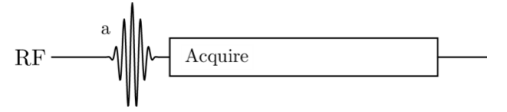

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def roty(a):
    R = [[np.cos(a), 0, np.sin(a)], [0, 1, 0], [-np.sin(a), 0, np.cos(a)]]
    return R

In [ ]:
def rotz(a):
    R = [[np.cos(a), -np.sin(a), 0], [np.sin(a), np.cos(a), 0], [0, 0, 1]]
    return R

In [ ]:
def freeprecession(T1, T2, w, t):
    # magnetisation returns to equilibrium via spin relaxation over time t,
    E1 = np.exp(-t/T1)
    E2 = np.exp(-t/T2)
    E = [[E2, 0, 0],
         [0, E2, 0],
         [0, 0, E1]]

    # precession is described as a rotation around z
    phi = float(w)*t

    # Create two matrices to describe the combined effect of relaxation and precession
    A = np.matmul(E, rotz(phi))
    B = [0, 0, 1-E1]

    return A, B

In [ ]:
def fid(TR, dt, a, M0, T1, T2star, w):
    t = np.arange(0, TR, dt)  # s, time of the experiment
    M_t = np.zeros(shape=(3, len(t)))
    M_t[:, 0] = M0

    # Flip the magnetisation onto transverse plane by an angle a. In this case,
    # assuming the B1 field is applied along the y axis,
    Rflip = roty(a)
    M = np.matmul(Rflip, M0)
    M_t[:, 1] = M

    # Evolution
    A, B = freeprecession(T1, T2star, w, dt)
    for n in range(2, len(t)):
        M_t[:, n] = np.matmul(A, M_t[:, n-1]) + B

    return t, M_t

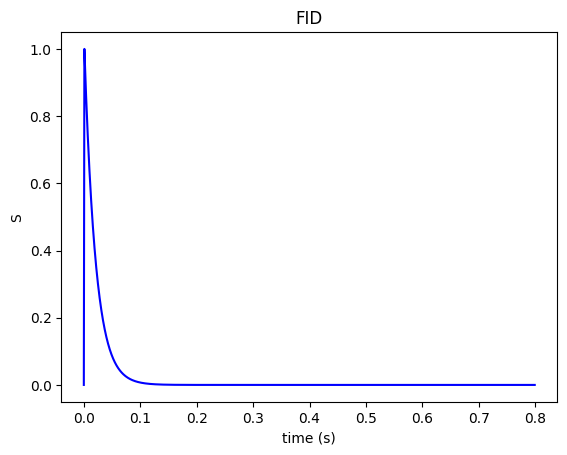

In [ ]:
# Define some parameters
T1 = 0.800  # s
T2star = 0.020  # s
B0 = 1.5  # Tesla (T)
gamma = 2*np.pi*42.6*1e6  # rad/s/T
w0 = gamma*B0  # rad/s
M0 = np.array([0, 0, 1])  # Magnetisation vector
dt = 0.001  # s

a = np.pi/2  # radians
TR = T1  # s

t, M_t = fid(TR, dt, a, M0, T1, T2star, w0)

S = np.sqrt(M_t[0]**2 + M_t[1]**2)
plt.plot(t, S, 'b')
plt.xlabel('time (s)')
plt.ylabel('S')
plt.title('FID')
plt.show()
